# **COLORINDO IMAGENS PRETO E BRANCO**

Aprenderemos a usar modelos pré-treinados PYTORCH para colorizar automaticamente uma foto em preto e branco (escala de cinza)

Arquitetura: 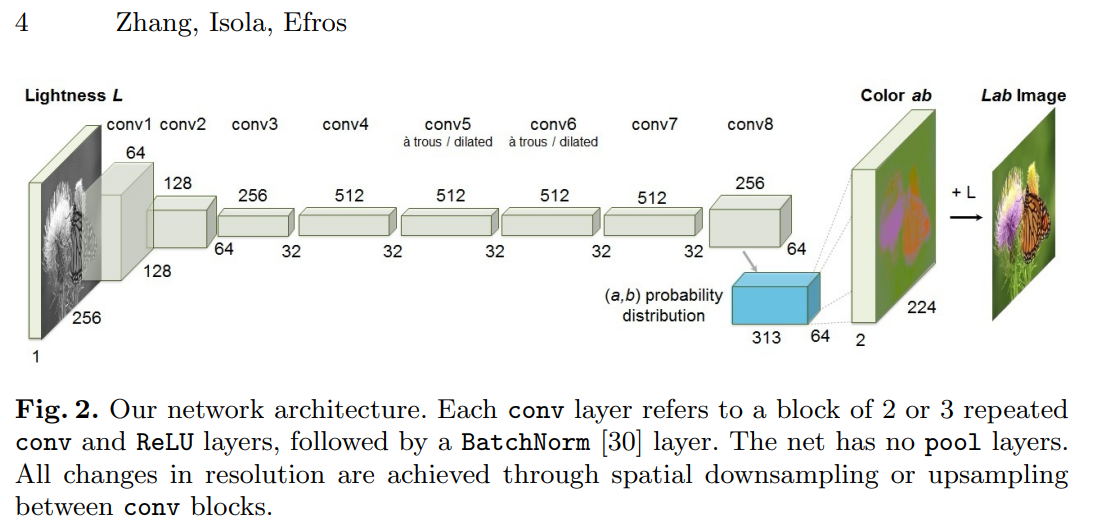


Colorizar imagens em preto e branco é uma técnica incrivelmente útil e incrível alcançada pelo aprendizado profundo.

Técnica introduzida pelo artigo : https://arxiv.org/abs/1603.08511 by Richard Zhang, Phillip Isola, Alexei A. Efros. In ECCV, 2016. Repositório: https://github.com/richzhang/colorization/tree/master

- Os autores aceitam a incerteza subjacente ao problema (conversão de preto e branco em cor) colocando-o como uma tarefa de classificação e utilizam o reequilíbrio de classes no momento da formação para aumentar a diversidade de cores no resultado. 

- O sistema é implementado como uma Feed-Forward numa CNN em tempo de teste e é treinado em mais de um milhão de imagens a cores.

- Os autores avaliaram o método usando Teste de Colorização Turing, perguntando aos participantes humanos para escolher entre as imagens coloridas geradas pelo modelo ou as imagens verdadeiras coloridas. 

- O método engana os humanos com sucesso em 32% dos testes, significativamente mais do que os métodos anteriores


![](http://richzhang.github.io/colorization/resources/images/teaser3.jpg)

# Espaço de Cor LAB

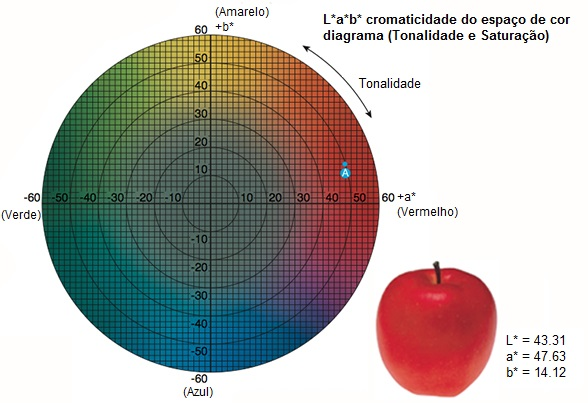


In [5]:

import cv2
import numpy as np
import torch
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt


In [6]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

(1102, 1080)


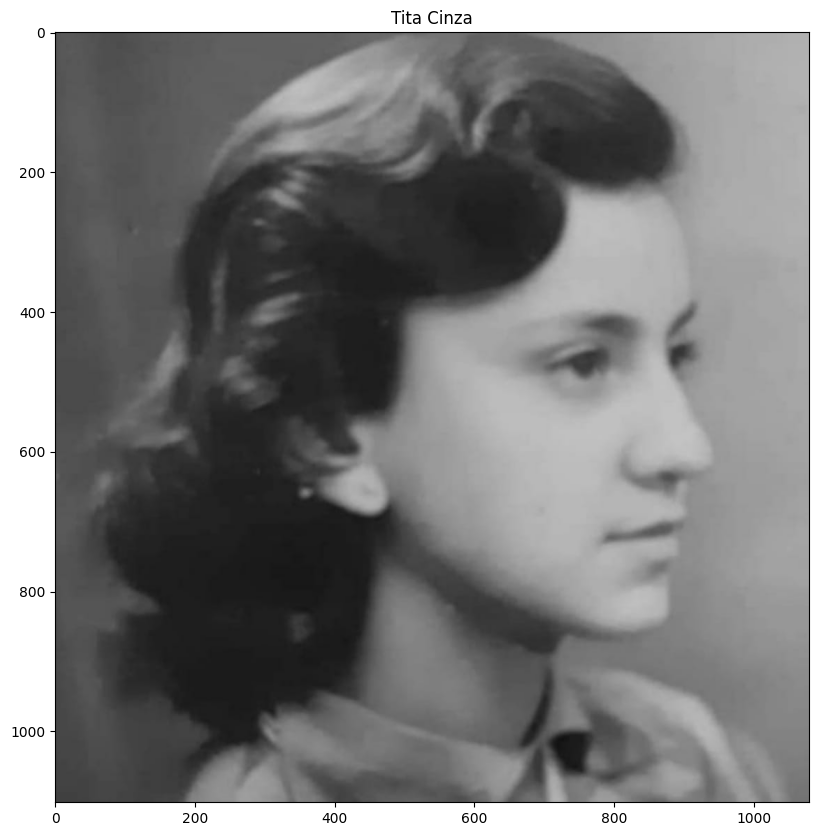

ECCVGenerator(
  (model1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (model2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (model3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=Tru

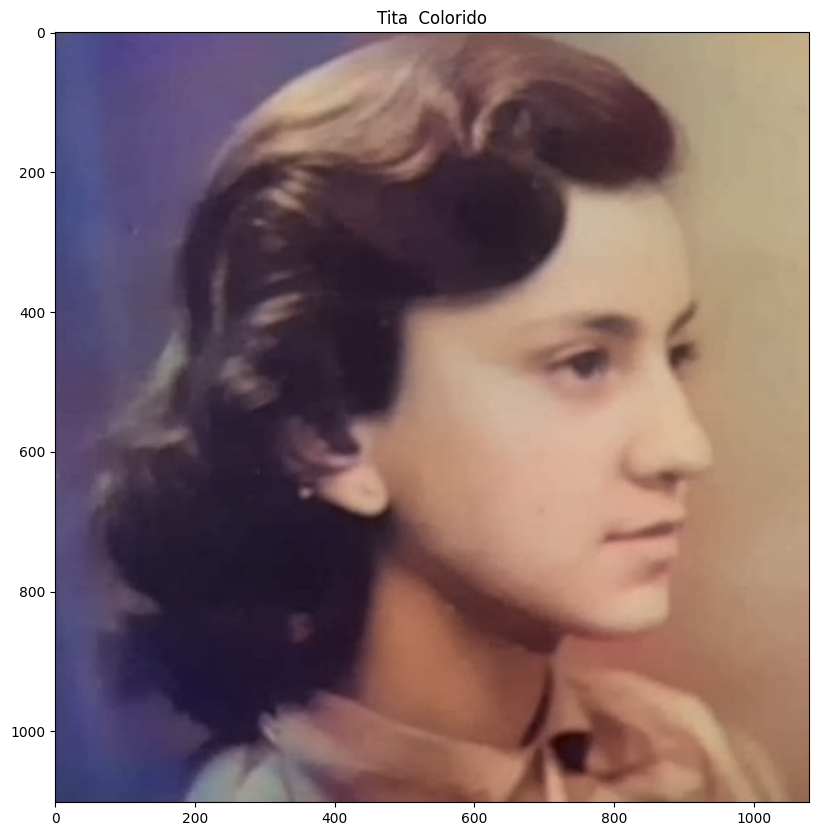

True

In [53]:
#pegar as imagens

from colorization import colorizers
from colorization.colorizers.util import load_img, preprocess_img, postprocess_tens

img_path = './blackandwhite/TITA.jpg'
bruce = cv2.imread(img_path,0)
print(bruce.shape)
imshow("Tita Cinza",bruce )

colorizer_eccv16 = colorizers.eccv16().eval() #Carrega o modelo de colorização eccv16.
# eval() Coloca o modelo em modo de avaliação, o que é necessário para inferência.

print(colorizer_eccv16)

colorizer_eccv16.cuda() #Move o modelo para a GPU (se disponível) para acelerar o processamento


img = load_img(img_path) #Carrega a imagem e converte para o formato adequado.
(tens_l_orig, tens_l_rs) = preprocess_img(img[:,:,:3], HW=(256,256)) #Pré-processa a imagem, 
#redimensionando para 256x256 e extraindo o canal L (luminância) do espaço de cores Lab.
tens_l_rs = tens_l_rs.cuda() #Move o tensor redimensionado para a GPU.

#postprocess_tens = Converte o tensor de volta para uma imagem no formato RGB.
#torch.cat = Cria uma imagem em preto e branco (sem canal de cor).
img_bw = postprocess_tens(tens_l_orig, torch.cat((0*tens_l_orig,0*tens_l_orig),dim=1))

# Aplica o modelo de colorização para gerar os canais de cor (ab) a partir do canal L.
out_img_eccv16 = postprocess_tens(tens_l_orig, colorizer_eccv16(tens_l_rs).cpu())
#cpu() Move o tensor de volta para a CPU para pós-processamento.

#Converte a imagem de RGB para BGR (formato esperado pelo OpenCV).
out_img_eccv16 = cv2.cvtColor(out_img_eccv16, cv2.COLOR_RGB2BGR)

imshow("Tita  Colorido",out_img_eccv16 )

cv2.imwrite('Vicentina.jpg', 255 * out_img_eccv16)
